In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hosammhmdali/supermarket-sales")

print("Path to dataset files:", path)

100%|██████████| 35.9k/35.9k [00:00<00:00, 31.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/hosammhmdali/supermarket-sales/versions/1


In [2]:
ls /root/.cache/kagglehub/datasets/hosammhmdali/supermarket-sales/versions/1

'supermarket_sales -.csv'


In [3]:
import pandas as pd
path = "/root/.cache/kagglehub/datasets/hosammhmdali/supermarket-sales/versions/1/supermarket_sales -.csv"
df = pd.read_csv(path)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


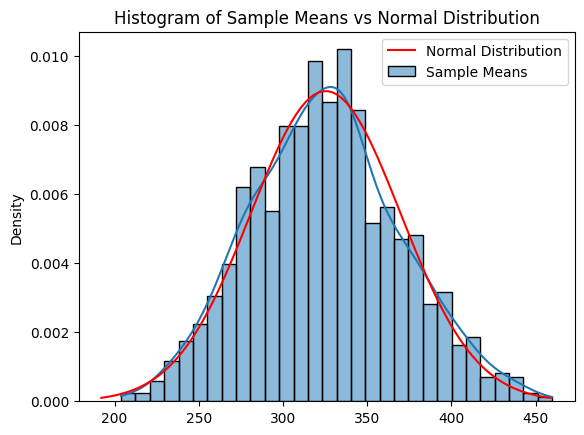

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


col = "Total"

sample_size = 30
num_samples = 1000
sample_means = [np.mean(np.random.choice(df[col].dropna(), sample_size)) for _ in range(num_samples)]

sns.histplot(sample_means, bins=30, kde=True, stat="density", label="Sample Means")

mean, std = np.mean(sample_means), np.std(sample_means)
x = np.linspace(mean - 3*std, mean + 3*std, 100)
pdf = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-((x - mean) ** 2) / (2 * std ** 2))

plt.plot(x, pdf, label="Normal Distribution", color="red")
plt.legend()
plt.title("Histogram of Sample Means vs Normal Distribution")
plt.show()

In [13]:
from scipy.stats import norm

mean, std = df[col].mean(), df[col].std()
print(f"Mean: {mean:.4f}, Standard Deviation: {std:.4f}")

Mean: 322.9667, Standard Deviation: 245.8853


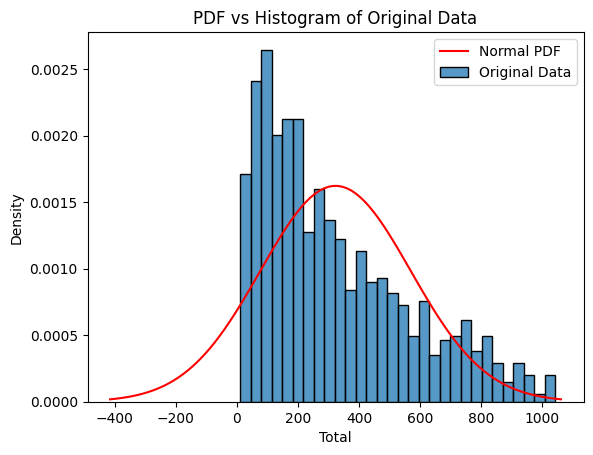

In [14]:
sns.histplot(df[col].dropna(), bins=30, kde=False, stat="density", label="Original Data")

x = np.linspace(mean - 3*std, mean + 3*std, 100)
pdf = norm.pdf(x, mean, std)
plt.plot(x, pdf, label="Normal PDF", color="red")

plt.legend()
plt.title("PDF vs Histogram of Original Data")
plt.show()

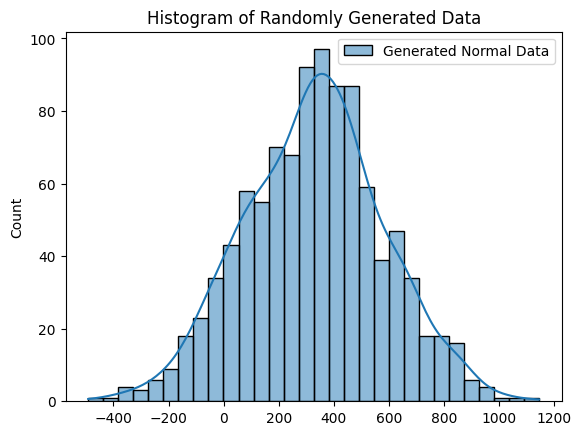

In [15]:
random_samples = np.random.normal(mean, std, 1000)

sns.histplot(random_samples, bins=30, kde=True, label="Generated Normal Data")
plt.title("Histogram of Randomly Generated Data")
plt.legend()
plt.show()

In [16]:
percentile_95 = norm.ppf(0.95, mean, std)
print(f"95th percentile: {percentile_95:.4f}")

95th percentile: 727.4121


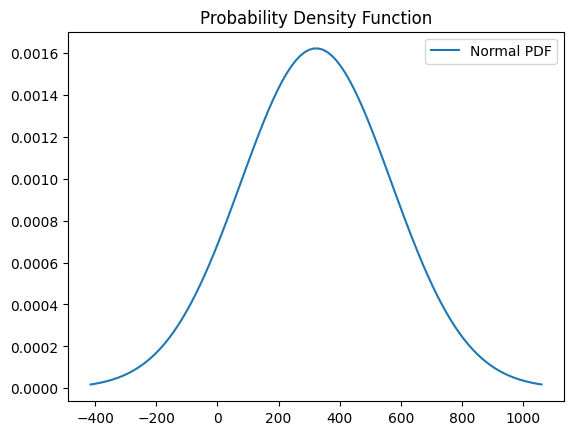

In [17]:
x_values = np.linspace(mean - 3*std, mean + 3*std, 100)
pdf_values = norm.pdf(x_values, mean, std)

plt.plot(x_values, pdf_values, label="Normal PDF")
plt.title("Probability Density Function")
plt.legend()
plt.show()

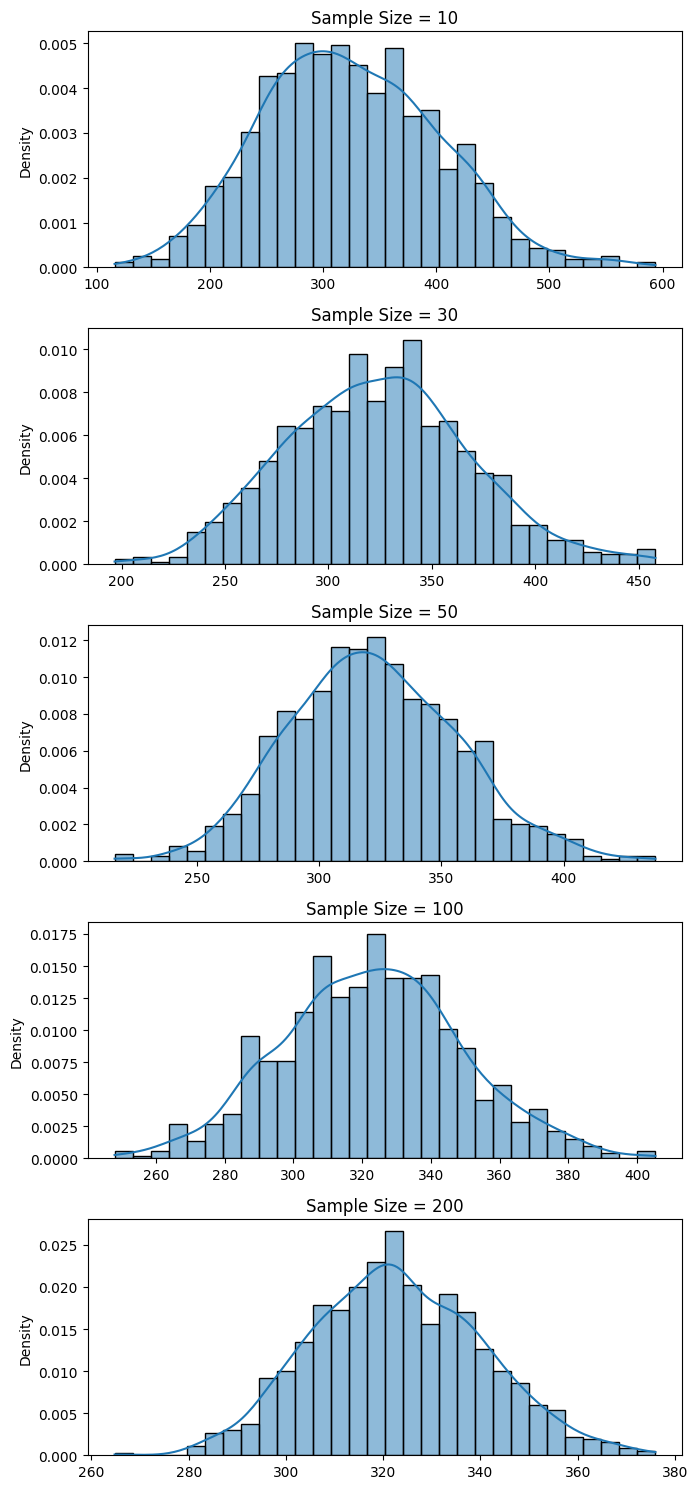

Original Data - Skewness: 0.8912, Kurtosis: -0.0875
Sample Size 10: Skewness = 0.2404, Kurtosis = -0.1031
Sample Size 30: Skewness = 0.1937, Kurtosis = -0.1196
Sample Size 50: Skewness = 0.0987, Kurtosis = -0.1334
Sample Size 100: Skewness = 0.1685, Kurtosis = -0.0737
Sample Size 200: Skewness = 0.3193, Kurtosis = 0.2271


In [18]:
from scipy.stats import skew, kurtosis

sample_sizes = [10, 30, 50, 100, 200]
fig, axes = plt.subplots(len(sample_sizes), 1, figsize=(7, 15))

for i, size in enumerate(sample_sizes):
    sample_means = [np.mean(np.random.choice(df[col].dropna(), size)) for _ in range(1000)]

    sns.histplot(sample_means, bins=30, kde=True, stat="density", ax=axes[i])
    axes[i].set_title(f"Sample Size = {size}")

plt.tight_layout()
plt.show()

original_skew, original_kurtosis = skew(df[col].dropna()), kurtosis(df[col].dropna())

print(f"Original Data - Skewness: {original_skew:.4f}, Kurtosis: {original_kurtosis:.4f}")

for size in sample_sizes:
    sample_means = [np.mean(np.random.choice(df[col].dropna(), size)) for _ in range(1000)]
    skewness, kurt = skew(sample_means), kurtosis(sample_means)
    print(f"Sample Size {size}: Skewness = {skewness:.4f}, Kurtosis = {kurt:.4f}")

In [20]:
z_score_99 = norm.ppf(0.99, mean, std)
print(f"99th Percentile Value: {z_score_99:.4f}")

99th Percentile Value: 894.9816
